# Logistic Regression with a Neural Network 

Build a logistic regression classifier to recognize cats- a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.


## 1 - Packages ##

Import the packages

In [1]:
import matplotlib.pyplot as plt # a library to plot graphs in Python
import numpy as np  #the fundamental package for scientific computing with Python
import h5py #a common package to interact with a dataset that is stored on an H5 file
%matplotlib inline

In [2]:
# hdf5 file is a single file which can be more convenient than having to zip/tar folders and files.
# hdf5 files are used extensively in the scientific community to store large datasets.

In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r") # open the file for reading
    print(train_dataset.keys()) # h5py.File acts like a Python dictionary, thus we can check the keys
    #object  obtained isn’t an array, but an HDF5 dataset, thus we need to convert to numpy arrays
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train set labels
    print(train_set_y_orig.shape)
    
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test set labels
    print(test_set_y_orig.shape)
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    print(train_set_y_orig.shape)
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    print(test_set_y_orig.shape)
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


## 2 - Dataset ##

Dataset ("data.h5") contains:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB) 
    - each image is square (height = num_px) and (width = num_px).
    - To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel
    value is a vector of three numbers ranging from 0 to 255.

In [4]:
# Loading the data (cat/non-cat)-each line of train_set_x_orig and test_set_x_orig is an array representing an image.
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

KeysView(<HDF5 file "train_catvnoncat.h5" (mode r)>)
(209,)
(50,)
(1, 209)
(1, 50)


In [5]:
#Check output of classes
classes

array([b'non-cat', b'cat'], 
      dtype='|S7')

### Pre-processing the dataset 

In [6]:
#Figure out the dimensions and shapes of the problem
print ("train_set_x shape: " + str(train_set_x_orig.shape)) #is a numpy-array of shape (m_train, num_px, num_px, 3)
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape)) # is a numpy-array of shape (m_test, num_px, num_px, 3)
print ("test_set_y shape: " + str(test_set_y.shape))

m_train = train_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
m_test = test_set_x_orig.shape[0]
print ("Number of testing examples: m_test = " + str(m_test))
num_px = train_set_x_orig.shape[1]
print ("Height/Width of each image: num_px = " + str(num_px))

print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")


train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


(64, 64, 3)
y = 0, it's a non-cat picture.


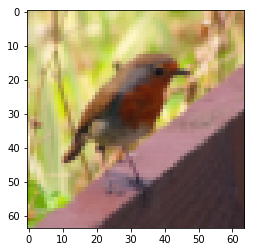

In [7]:
# Example of a picture
image=10
print(train_set_x_orig[image].shape)# check the shape of the image
plt.imshow(train_set_x_orig[image]) #select the 10th image
y_value=train_set_y[0, image]
print ("y = " + str(y_value) + ", it's a "+ classes[(y_value)].decode("utf-8") +" picture.")       

Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1). The training (and test) dataset is a numpy-array where each column represents a flattened image. The columns will  be m_train (respectively m_test).

To flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b*c*d,a): X_flatten = X.reshape(X.shape[0],-1).T where X.T is the transpose of X  where a= m_train/m_test b,c=num_pixels d=channel number



In [8]:
# Reshape the x datasets such that each example is now a vector of size (num_px * num_px * 3, 1), y examples do not need pre-proccessing 
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
train_set_x = train_set_x_orig.reshape(m_train,-1).T
test_set_x = test_set_x_orig.reshape(m_test,-1).T

print ("train_set_x_flatten shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x[:,10].shape)) #selecting 10th image

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: (12288,)


One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

In [ ]:
#Centering the training set
train_set_x = np.asarray(train_set_x, dtype=np.float64) #convert the dtype('uint8') to dtype('float64')

np.mean(train_set_x) # calculates the mean of the array 
train_set_x-=np.mean(train_set_x) # the -= can be read as x = x- np.mean(x,axis = 0) subtracts mean of x from each value in x
np.std(train_set_x) # this calcualtes the standard deviation of the array
train_set_x/=np.std(train_set_x) # the /=  can be read as x = x/np.std(x) 
train_set_x.min(),train_set_x.max(),train_set_x.shape


In [ ]:
#Centering the testing set
test_set_x = np.asarray(test_set_x).astype(float)
test_set_x-= test_set_x.mean() 
test_set_x /= test_set_x.std()
test_set_x.min(),test_set_x.max(),test_set_x.shape


For picture datasets, it is more convenient and works almost as well to  divide every row of the dataset(all pixel values) by 255 (the maximum value of a pixel channel). This is performed across all channels.


In [9]:
#Standardize the dataset/ Normalize the image arrays
train_set_x = train_set_x/255
test_set_x = test_set_x/255
train_set_x.min(),train_set_x.max(),train_set_x.shape

(0.0, 1.0, (12288, 209))

## 3 -  Architecture of the learning algorithm ##
Build a Logistic Regression to distinguish cat images from non-cat images. Logistic Regression is simple Neural Network.

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

## 4 - Building the parts of the algorithm ## 
The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

Build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

Implement `sigmoid()` need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions.

In [10]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    s =1/(1+np.exp(-1*(z))) #np.exp element-wise exponential of input array
    return s

In [11]:
#Check the sigmoid function with an input array
z=np.array([1,2])
print ("sigmoid([1,2])= "+ str(sigmoid(z)))

sigmoid([1,2])= [ 0.73105858  0.88079708]


### 4.2 - Initializing parameters
Implement parameter initialization - initialize w as a vector of zeros and b as scalar

In [12]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1)) # n rows and 1 column-->row vector
    b = 0
    return w, b

In [13]:
n_rows = 2
w, b = initialize_with_zeros(n_rows)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


### 4.3 - Forward and Backward propagation

Perform "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- Get X
- Compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Two formulas to use: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Implement a function propagate() that computes the cost function and its gradient.

In [14]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation using above
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    m = X.shape[1] #number of training examples
 
    # FORWARD PROPAGATION (FROM X TO COST)
    # w is (r,1)-->transpose w so it is (1,r)--> column vector; X is (r,m), thus A is (1,m)
    A = sigmoid((np.dot(w.T,X))+b)
    
    # compute activation
    #  Y is (1,m); A is (1,m)-->transpose A so it is (m,1)--> column vector, thus cost is (1,1) 
    cost_one_sample = np.dot(Y,np.log(A).T)+ np.dot((1-Y),np.log(1-A).T) 
    cost=(-1/m)*np.sum(cost_one_sample)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw =(1/m)*(np.dot((X),(A-Y).T))
    db = (1/m)*(np.sum(A-Y))
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [15]:
#Check the cost function and gradient using input arrays
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
propagate(w, b, X, Y)


({'db': 0.001455578136784208, 'dw': array([[ 0.99845601],
         [ 2.39507239]])}, 5.8015453193945534)

### 4.4 - Optimization
Update the parameters using gradient descent. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

Optimize the loss iteratively to learn parameters (w,b):
- computing the cost and its gradient
- updating the parameters using gradient descent
 
Implement an optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$.


In [16]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []
    for i in range(num_iterations):       
        # Calculate the cost and the gradient for the current parameters using propagate().
        grads, cost = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        # update the parameters using gradient descent rule for w and b.
        w = w-learning_rate*dw
        b = b-learning_rate*db
        # Record the costs
        if i % 100 == 0: # i=200 divided by 100 remainder==0 --> appends the cost per 100 iterations
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    #Storing the outputs in a dictionary
    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs

In [17]:
#Check the function by putting inputs-this function will output the learned w and b
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.19033591]
 [ 0.12259159]]
b = 1.92535983008
dw = [[ 0.67752042]
 [ 1.41625495]]
db = 0.219194504541


To compute predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`.

Implement predict function which uses the learned w and b to predict the labels for a dataset X. 

In [18]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
   '''
    m = X.shape[1] #number of training samples
    Y_prediction = np.zeros((1,m)) # y_hat zero vector (1,num of training samples)
    w = w.reshape(X.shape[0], 1) # reshape w to ensure it is numpy array of size (num_px * num_px * 3, 1)
     
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid((np.dot(w.T,X))+b) # A is (1,number of training samples)
    for i in range(A.shape[1]): #
        # Convert probabilities A[0,i] to actual predictions 0/1     
        if A[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
        #or using vectorized way Y_prediction[0,i] = 0 if A[0, i] < 0.5 else 1
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [19]:
#Check the predict function by putting inputs
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.  0.]]


## 5 - Merge all functions into a model ##
Implement the model function using the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [20]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function previously implemented
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters with zeros using intialize_with_zeros function 
    num_rows=X_train.shape[0] # num_rows=num_px * num_px * 3
    w, b = initialize_with_zeros(num_rows)
    # Gradient descent using optimize function 
    parameters, grads, costs= optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the cell to train model

In [21]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check that the model is working and has high enough capacity to fit the training data. 

Test accuracy is 68%, which is not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 

Also,the model is overfitting the training data. To reduce overfitting we can use regularization. 

In [22]:
test_set_x
test_set_x.shape

(12288, 50)

In [23]:
test_set_x[:,0] #selecting first image

array([ 0.61960784,  0.40784314,  0.3254902 , ...,  0.67843137,
        0.50196078,  0.43137255])

In [24]:
#test_set_x[:,0].reshape((num_px, num_px, 3))

y =0, you predicted that it is a "non-cat" picture.


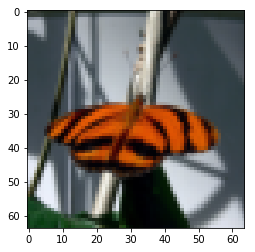

In [25]:
# Example of a picture that was correctly classified.
index = 45
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y ="+ str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8")+  "\" picture.")

Plot the cost function and the gradients.

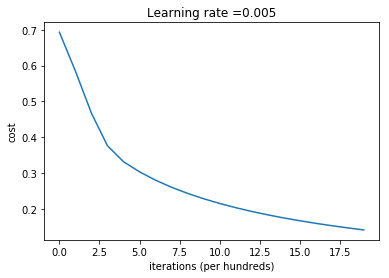

In [26]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
The cost decreasing as the iterations increase, which shows that the parameters are being learned. If train the model even more on the training set by increasing the number of iterations and reruning the cells, then the training set accuracy goes up, but the test set accuracy goes down leading to overfitting. 

## 6 - Further analysis  ##
Examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####
For Gradient Descent to work we must choose a well-tuned learning rate.Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm.

The learning rate $\alpha$  determines how rapidly we update the parameters. 
- If the learning rate is too large we may "overshoot" the optimal value.
- if it is too small we will need too many iterations to converge to the best values.

Compare the learning curve of our model with several choices of learning rates.

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



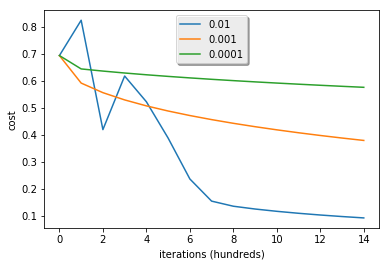

In [27]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[i] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(models[i]["costs"], label= str(models[i]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though here using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. Have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning:
    - Choose the learning rate that better minimizes the cost function.
    - If  model overfits, use other techniques to reduce overfitting.

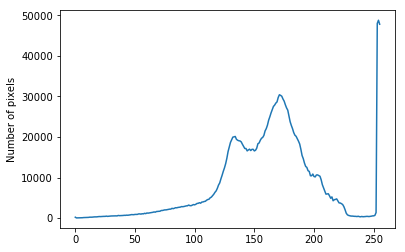

In [28]:
#Test with own image
import scipy
from scipy import ndimage as ndi
my_image = "my_image2.jpg" 

#Preprocess the image to fit algorithm.
foldername = "images/" + my_image
image = ndi.imread(foldername) # 3D array
hist=ndi.histogram(image,min=0, max=256, bins=256)
plt.plot(hist)
plt.ylabel("Number of pixels")

(681, 1024, 3)
(64, 64, 3)
(12288, 1)
y = 1.0, your algorithm predicts a "cat" picture.


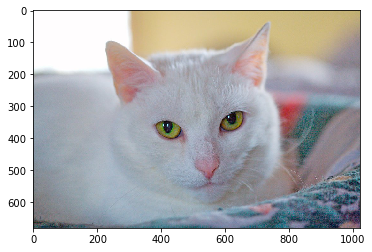

In [29]:
#Pre-proccess the image to fit the alogrithm/normalize to the range 0-1
image = image/255
print(image.shape) #image needs to be resized
my_image = scipy.misc.imresize(image, size=(num_px,num_px,3))
print(my_image.shape)
my_image=my_image.reshape((num_px*num_px*3,1))
print(my_image.shape)

#check if the algorithm is right (1 = cat, 0 = non-cat)
my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")